#### Опис алгоритму роботи агента

Для реалізації роботи агента був розроблений класс Agent.<br>
Екземпляр цього класу при створенні приймає 3 аргументи: номер початкової вершини, номер кінцевої вершини та граф-дорогу (екземпляр класу Graph).<br>
Алгоритм з пошуку оптимальної вершини та руху агента реалізований у функції move, класу Agent. Ця функція працює таким чином:<br>
Проводиться обхід по всім сусіднім вершинам. У випадку якщо сусідня вершна вже була відвідана, вона пропускається. Для раніше не відвіданих вершин ми обраховуємо відстань до кінцевої вершини за формулою: _|ax - bx| + |ay - by|, де (ax, ay) - координати сусідньої вершини, (bx, by) - координати кінцевої вершини_. Сусідня вершина, відстань від якої до кінцевої вершини буде найменшою, обирається для переходу в неї. У випадку якщо всі сусідні вершини вже були відвідані, у якості наступної вершини ми обираємо ту, з якої прийшли у поточну. Вищеописані кроки повторюються до тих пір, пока агент не прибуде до кінцевої вершини.

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

In [2]:
class Graph:
    def __init__(self, vertices=25, edges_to_remove=10):
        self.vertices = vertices
        self.width = int(vertices ** 0.5)
        self.structure = {i: [] for i in range(vertices)}
        self._form_structure()
        self._remove_edges(edges_to_remove)
        self._coords = {}
        self._calc_coords()

    def _form_structure(self):
        for i in range(self.vertices-1):
            if (i+1) % self.width != 0:
                self.structure[i].append(i+1)
                self.structure[i+1].append(i)
            if i < (self.vertices - self.width):
                self.structure[i].append(i+self.width)
                self.structure[i+self.width].append(i)

    def _calc_coords(self):
        for i in range(self.width):
            for t in range(self.width):
                self._coords[t+(i*5)] = [i, t]

    def _add_edge(self, v1, v2):
        self.structure[v1].append(v2)
        self.structure[v2].append(v1)

    def _delete_edge(self, v1, v2):
        self.structure[v1].remove(v2)
        self.structure[v2].remove(v1)

    def _is_connected(self):
        not_visited = [i for i in range(self.vertices)]
        queue = [0]

        while queue:
            s = queue.pop(0)
            for neighbor in self.structure[s]:
                if neighbor in not_visited:
                    not_visited.remove(neighbor)
                    queue.append(neighbor)

        return not bool(not_visited)

    def _remove_edges(self, count):
        i = 0
        while i < count:
            vertex = random.randint(0, len(self.structure)-1)
            if len(self.structure[vertex])-1 == 0:
                continue
            neighbor = random.randint(0, len(self.structure[vertex])-1)
            neighbor = self.structure[vertex][neighbor]

            self._delete_edge(vertex, neighbor)
            if not self._is_connected():
                self._add_edge(vertex, neighbor)
            else:
                i += 1

    def get_neighs(self, vert):
        a = {}
        for i in self.structure[vert]:
            a[i] = self._coords[i]
        return a

    def get_coords(self, vertex):
        return self._coords[vertex]

In [3]:
class Agent():
    def __init__(self, pos, des, road):
        self.pos = pos
        self.des = des
        self.road = road
        self.neighs = road.get_neighs(pos)
        self.hist = []
        self.map = []

    def move(self):
        while self.pos != self.des:
            best = float('inf')
            vert = None
            desX, desY = self.road.get_coords(self.des)

            for neigh in self.neighs:
                if neigh not in self.hist:
                    x, y = self.road.get_coords(neigh)
                    dist = abs(x - desX) + abs(y - desY)
                    if dist < best:
                        best = dist
                        vert = neigh

            if vert is None:
                vert = self.map[-1]
                self.map.pop()
            else:
                self.map.append(self.pos)

            self.hist.append(self.pos)
            self.pos = vert
            self.neighs = self.road.get_neighs(self.pos)

        self.hist.append(self.pos)

In [4]:
def draw_graph(graph):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')

    coords = []
    for i in range(graph.width):
        for t in range(graph.width):
            coords.append([(i+1)*50,(t+1)*50])
            circle = Circle(((i+1)*50, (t+1)*50), 8, fill=True, color='black')
            ax.add_patch(circle)
            ax.text((i+1)*50, (t+1)*50, t+(i*5),
                    fontsize=10, color='white', ha='center', va='center')

    for i in graph.structure:
        for t in graph.structure[i]:
            line = Line2D([coords[i][0], coords[t][0]],
                          [coords[i][1], coords[t][1]],
                          color='black', linewidth=1)
            ax.add_line(line)

    ax.plot()
    ax.axis('off')
    plt.show()

    return coords

In [5]:
def draw_agent(agent, coords):
    print('Initial vertex:', agent.hist[0])
    print('Final vertex:', agent.hist[-1])
    print('Steps:', len(agent.hist)-1)
    print('Way:', end=' ')
    for i in agent.hist:
        print(i, end=f'{"" if i == agent.hist[-1] else " -> "}')
    print('\n')

    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')

    pairs = [(agent.hist[i], agent.hist[i+1]) for i in range(len(agent.hist)-1)]
    pairs.append((agent.des, agent.des))

    for a, b in pairs:
        line = Line2D([coords[a][0], coords[b][0]],
                        [coords[a][1], coords[b][1]], color='black', linewidth=1)
        ax.add_line(line)
        x, y = coords[a]
        circle = Circle((x, y), 8, fill=True, color='black')
        ax.add_patch(circle)
        ax.text(x, y, a, fontsize=10, color='white', ha='center', va='center')

    ax.plot()
    ax.axis('off')
    plt.show()

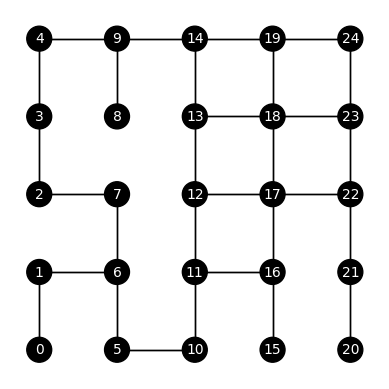

In [6]:
graph = Graph()
crds = draw_graph(graph)

Initial vertex: 0
Final vertex: 24
Steps: 10
Way: 0 -> 1 -> 6 -> 7 -> 2 -> 3 -> 4 -> 9 -> 14 -> 19 -> 24



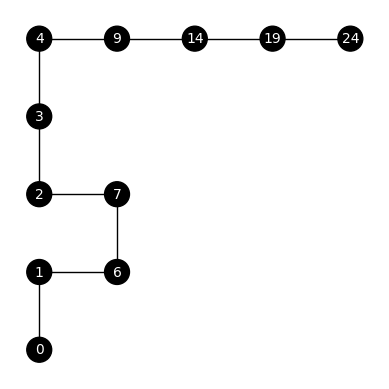

In [7]:
rand = False
a = random.randint(0, 24) if rand else 0
b = random.randint(0, 24) if rand else 24

agent = Agent(a, b, graph)
agent.move()

draw_agent(agent, crds)

#### Висновок
Під час виконання лабораторної роботи я отримав навички роботи з інтелектуальними агентами шляхом розробки інтелектуального агента-машини що рухається по графу-дорозі з попередньої лабораторної роботи.